#   Predict ICC World Cup Winner using Machine Learning in Python


###### Scoring is easy in cricket. Maybe when you watch it on TV, it looks easy. But predicting is not. You have to use your brain and time 


#### The ICC Cricket World Cup is the international championship of One Day International cricket. The event is organised by the sport's governing body, the International Cricket Council, every four years, with preliminary qualification rounds leading up to a final tournament

#### The data I have used to predict the team winning the world cup resides in wide resources

1. ODI International matches happened from 2006  to today - https://cricsheet.org/downloads/#experimental
a directory with 1391 files containing match details in csv - odi_csv_male directory
2. Current ICC ODI Rankings - https://www.icc-cricket.com/rankings/mens/team-rankings/odi 
a csv file containing the team rankings with points - icc_rankings.csv
3. Worlcup fixtures data - https://www.business-standard.com/article/sports/icc-world-cup-2019-fixtures-schedule-of-who-plays-whom-when-and-where-119051601153_1.html
a csv file containing the fixtures - fixtures.csv ( doesnot have city details )
4. A Text data containing the schedule to extract the city details-https://www.thehindu.com/sport/cricket/icc-cricket-world-cup-2019-schedule/article26268656.ece - wordlcup fixtures.csv

In [1]:
#Importing required libraries
import pandas as pd
import glob
import random
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
import seaborn as sns


### Data Understanding

In [2]:
#2.
rankings = pd.read_csv('/home/sanjayd/Downloads/icc_rankings.csv')
rankings

Position          Team  Points
0         1       England     125
1         2         India     121
2         3  South Africa     115
3         4   New Zealand     113
4         5     Australia     109
5         6      Pakistan      94
6         7    Bangladesh      90
7         8   West Indies      77
8         9     Sri Lanka      76
9        10   Afghanistan      63

In [3]:
#3.
fixtures = pd.read_csv('/home/sanjayd/Downloads/fixtures.csv')
fixtures

Round Number        Date                                      Location  \
0             1  30/05/2019                       Kennington Oval, London   
1             1  31/05/2019                      Trent Bridge, Nottingham   
2             1    1/6/2019                       Sophia Gardens, Cardiff   
3             1    1/6/2019                        County Ground, Bristol   
4             1    2/6/2019                       Kennington Oval, London   
5             1    3/6/2019                      Trent Bridge, Nottingham   
6             1    4/6/2019                       Sophia Gardens, Cardiff   
7             1    5/6/2019                    The Rose Bowl, Southampton   
8             1    5/6/2019                       Kennington Oval, London   
9             1    6/6/2019                      Trent Bridge, Nottingham   
10            1    7/6/2019                        County Ground, Bristol   
11            1    8/6/2019                       Sophia Gardens, Cardiff   
12            1    8/6/2019  The Cooper Associates County Ground, Taunton   
13            1    9/6/2019                       Kennington Oval, London   
14            1   10/6/2019                    The Rose Bowl, Southampton   
15            1   11/6/2019                        County Ground, Bristol   
16            1   12/6/2019  The Cooper Associates County Ground, Taunton   
17            1  13/06/2019                      Trent Bridge, Nottingham   
18            1  14/06/2019                    The Rose Bowl, Southampton   
19            1  15/06/2019                       Kennington Oval, London   
20            1  15/06/2019                       Sophia Gardens, Cardiff   
21            1  16/06/2019             Emirates Old Trafford, Manchester   
22            1  17/06/2019  The Cooper Associates County Ground, Taunton   
23            1  18/06/2019             Emirates Old Trafford, Manchester   
24            1  19/06/2019                         Edgbaston, Birmingham   
25            1  20/06/2019                      Trent Bridge, Nottingham   
26            1  21/06/2019                             Headingley, Leeds   
27            1  22/06/2019                    The Rose Bowl, Southampton   
28            1  22/06/2019             Emirates Old Trafford, Manchester   
29            1  23/06/2019                                Lord's, London   
30            1  24/06/2019                    The Rose Bowl, Southampton   
31            1  25/06/2019                                Lord's, London   
32            1  26/06/2019                         Edgbaston, Birmingham   
33            1  27/06/2019             Emirates Old Trafford, Manchester   
34            1  28/06/2019           Riverside Ground, Chester-le-Street   
35            1  29/06/2019                             Headingley, Leeds   
36            1  29/06/2019                                Lord's, London   
37            1  30/06/2019                         Edgbaston, Birmingham   
38            1    1/7/2019           Riverside Ground, Chester-le-Street   
39            1    2/7/2019                         Edgbaston, Birmingham   
40            1    3/7/2019           Riverside Ground, Chester-le-Street   
41            1    4/7/2019                             Headingley, Leeds   
42            1    5/7/2019                                Lord's, London   
43            1    6/7/2019                             Headingley, Leeds   
44            1    6/7/2019             Emirates Old Trafford, Manchester   
45  Semi Finals    9/7/2019             Emirates Old Trafford, Manchester   
46  Semi Finals   11/7/2019                         Edgbaston, Birmingham   
47       Finals  14/07/2019                                Lord's, London   

             Team_1           Team_2   Group   Result  
0           England     South Africa  Group A     NaN  
1       West Indies         Pakistan  Group A     NaN  
2       New Zealand        Sri Lanka  Group A     NaN  
3    

In [4]:
#4.
fixtures_raw_data=pd.read_csv("/home/sanjayd/Downloads/worldcup fixtures.csv")
fixtures_raw_data.head(5)

Data
0  May 30 (Thursday): England vs South Africa -Th...
1  May 31 (Friday): West Indies vs Pakistan -Tren...
2  June 1 (Saturday): New Zealand vs Sri Lanka -C...
3  June 1 (Saturday): Afghanistan vs Australia-Br...
4  June 2 (Sunday): South Africa vs Bangladesh -T...

In [5]:
#Lets understand what data it has
# We will extra city from this dataframe later
fixtures_raw_data.Data[0]

'May 30 (Thursday): England vs South Africa -The Oval'

### Exploratory Data Analysis

In [6]:
# Extracting the data from 1391 files in odi_csv_male_folder

In [7]:
#1.
path = '/home/sanjayd/Downloads/odi_csv_male'

matches_fixings = glob.glob(path+ "/*.csv")
df_final = []
for match in matches_fixings:
    df = pd.read_csv(match,names=list(range(3)))
    df=df.T
    new_header = df.iloc[1] 
    df = df.loc[2:].head(1)
    df.columns=new_header
    df=df.head(1)
    list_col=list(df.columns)
    if list_col.count('date')>1:
        pass    
    else:
        if 'winner' in list_col:  
            df=df[['team','date','venue','city','toss_winner','winner']]
            df.columns=['team1','team2','date','venue','city','toss_winner','winner']
            df_final.append(df)
    
results = pd.concat(df_final, ignore_index=True)
results

team1         team2        date  \
0      West Indies    Bangladesh  2007/04/19   
1          England    Bangladesh  2010/07/12   
2          Ireland   New Zealand  2007/04/09   
3      West Indies         India  2006/05/20   
4      West Indies      Zimbabwe  2010/03/12   
5      West Indies    Bangladesh  2009/07/28   
6         Scotland      Pakistan  2013/05/17   
7        Sri Lanka     Australia  2011/08/16   
8        Australia      Pakistan  2014/10/10   
9       Bangladesh     Australia  2011/04/13   
10     New Zealand     Sri Lanka  2019/06/01   
11      Bangladesh      Zimbabwe  2015/11/11   
12           India  South Africa  2015/02/22   
13           India   New Zealand  2010/11/28   
14        Pakistan     Sri Lanka  2011/11/11   
15      Bangladesh         India  2010/06/16   
16           India       England  2008/11/23   
17         Ireland      Scotland  2015/01/12   
18       Australia     Sri Lanka  2012/03/04   
19      Bangladesh   Afghanistan  2016/10/01   
20      Bangladesh     Sri Lanka  2014/02/17   
21       Australia      Pakistan  2009/05/03   
22       Sri Lanka      Pakistan  2006/03/22   
23     Afghanistan       Ireland  2017/03/15   
24       Australia      Pakistan  2012/09/03   
25     West Indies       England  2017/03/05   
26         England     Australia  2015/09/13   
27          Canada   Netherlands  2006/12/01   
28         England      Pakistan  2016/08/24   
29     New Zealand     Australia  2007/02/20   
...            ...           ...         ...   
1286   Netherlands  South Africa  2007/03/16   
1287       England         India  2011/09/09   
1288   West Indies      Pakistan  2013/07/14   
1289      Zimbabwe    Bangladesh  2011/08/16   
1290       Ireland      Scotland  2014/09/08   
1291  South Africa      Pakistan  2013/11/24   
1292     Australia     Sri Lanka  2006/02/14   
1293      Zimbabwe   West Indies  2007/11/30   
1294     Sri Lanka      Pakistan  2012/06/07   
1295         Kenya      Zimbabwe  2011/03/20   
1296       Ireland        Canada  2011/09/20   
1297     Australia   New Zealand  2009/02/10   
1298     Australia     Sri Lanka  2012/02/10   
1299         Kenya       Bermuda  2007/10/25   
1300         India     Sri Lanka  2014/11/16   
1301    Bangladesh      Zimbabwe  2014/11/28   
1302      Scotland     Hong Kong  2016/09/10   
1303   West Indies     Australia  2008/07/04   
1304  South Africa      Pakistan  2013/11/30   
1305  South Africa      Zimbabwe  2010/10/22   
1306   West Indies      Pakistan  2011/05/02   
1307  South Africa     Australia  2009/04/05   
1308     Sri Lanka         India  2008/08/29   
1309     Sri Lanka      Pakistan  2009/08/03   
1310     Australia     Sri Lanka  2012/03/02   
1311         India       England  2006/04/15   
1312     Sri Lanka         India  2010/08/28   
1313        Canada         Kenya  2011/03/07   
1314   West Indies    Bangladesh  2014/08/25   
1315       England   West Indies  2009/05/24   

                                                  venue           city  \
0                           Kensington Oval, Bridgetown       Barbados   
1                                             Edgbaston     Birmingham   
2                                    Providence Stadium         Guyana   
3                                 Sabina Park, Kingston        Jamaica   
4                          Arnos Vale Ground, Kingstown     St Vincent   
5                                  Windsor Park, Roseau       Dominica   
6             Grange Cricket Club Ground, Raeburn Place      Edinburgh   
7     Mahinda Rajapaksa International Cricket Stadiu...     Hambantota   
8                   Dubai International Cricket Stadium            NaN   
9                         Shere Bangla National Stadium         Mirpur   
10                                       Sophia Gardens        Cardiff   
11                        Shere Bangla National Stadium         Mirpur   
12                             Melbourne Cricket Ground            NaN   


#### Teams part of world cup - 'England', 'South Africa',  'West Indies',  'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 'Australia', 'Bangladesh', 'India'


In [8]:
# Lets filter the dataset containing world cup teams
worldcup_teams = ['England', 'South Africa',  'West Indies',
            'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 
            'Australia', 'Bangladesh', 'India']
results['team1']=results['team1'].astype(str)
results['team2']=results['team2'].astype(str)

df1 = results[results['team1'].isin(worldcup_teams)]
df_teams = df1[df1['team2'].isin(worldcup_teams)]
df_teams

team1         team2        date  \
0      West Indies    Bangladesh  2007/04/19   
1          England    Bangladesh  2010/07/12   
3      West Indies         India  2006/05/20   
5      West Indies    Bangladesh  2009/07/28   
7        Sri Lanka     Australia  2011/08/16   
8        Australia      Pakistan  2014/10/10   
9       Bangladesh     Australia  2011/04/13   
10     New Zealand     Sri Lanka  2019/06/01   
12           India  South Africa  2015/02/22   
13           India   New Zealand  2010/11/28   
14        Pakistan     Sri Lanka  2011/11/11   
15      Bangladesh         India  2010/06/16   
16           India       England  2008/11/23   
18       Australia     Sri Lanka  2012/03/04   
19      Bangladesh   Afghanistan  2016/10/01   
20      Bangladesh     Sri Lanka  2014/02/17   
21       Australia      Pakistan  2009/05/03   
22       Sri Lanka      Pakistan  2006/03/22   
24       Australia      Pakistan  2012/09/03   
25     West Indies       England  2017/03/05   
26         England     Australia  2015/09/13   
28         England      Pakistan  2016/08/24   
29     New Zealand     Australia  2007/02/20   
31      Bangladesh      Pakistan  2010/06/21   
33           India       England  2013/01/11   
34      Bangladesh   Afghanistan  2016/09/28   
35           India       England  2006/04/12   
37           India  South Africa  2019/06/05   
38     Afghanistan    Bangladesh  2015/02/18   
39       Australia      Pakistan  2015/03/20   
...            ...           ...         ...   
1272       England     Sri Lanka  2014/06/03   
1273     Australia  South Africa  2009/01/18   
1274  South Africa     Sri Lanka  2015/03/18   
1275   New Zealand   West Indies  2006/03/04   
1276   New Zealand       England  2013/02/20   
1277     Australia       England  2007/02/02   
1278       England     Australia  2009/09/06   
1281     Sri Lanka   New Zealand  2013/11/12   
1282   West Indies  South Africa  2010/05/28   
1283     Sri Lanka       England  2014/12/16   
1285     Sri Lanka         India  2010/06/22   
1287       England         India  2011/09/09   
1288   West Indies      Pakistan  2013/07/14   
1291  South Africa      Pakistan  2013/11/24   
1292     Australia     Sri Lanka  2006/02/14   
1294     Sri Lanka      Pakistan  2012/06/07   
1297     Australia   New Zealand  2009/02/10   
1298     Australia     Sri Lanka  2012/02/10   
1300         India     Sri Lanka  2014/11/16   
1303   West Indies     Australia  2008/07/04   
1304  South Africa      Pakistan  2013/11/30   
1306   West Indies      Pakistan  2011/05/02   
1307  South Africa     Australia  2009/04/05   
1308     Sri Lanka         India  2008/08/29   
1309     Sri Lanka      Pakistan  2009/08/03   
1310     Australia     Sri Lanka  2012/03/02   
1311         India       England  2006/04/15   
1312     Sri Lanka         India  2010/08/28   
1314   West Indies    Bangladesh  2014/08/25   
1315       England   West Indies  2009/05/24   

                                                  venue         city  \
0                           Kensington Oval, Bridgetown     Barbados   
1                                             Edgbaston   Birmingham   
3                                 Sabina Park, Kingston      Jamaica   
5                                  Windsor Park, Roseau     Dominica   
7     Mahinda Rajapaksa International Cricket Stadiu...   Hambantota   
8                   Dubai International Cricket Stadium          NaN   
9                         Shere Bangla National Stadium       Mirpur   
10                                       Sophia Gardens      Cardiff   
12                             Melbourne Cricket Ground          NaN   
13                                        Nehru Stadium     Guwahati   
14                  Dubai International Cricket Stadium          NaN   
15               Rangiri Dambulla International Stadium          NaN   
16                                M Chinnaswamy Stadium    Bangalore   
18               Brisbane Cr

#### Who won toss the most number of times?

In [9]:
df_teams['toss_winner'].value_counts(sort=True)

India           132
Sri Lanka       132
England         124
Australia       122
South Africa    115
Pakistan        101
New Zealand      96
West Indies      90
Bangladesh       68
Afghanistan       9
Name: toss_winner, dtype: int64

#### Does winning the toss helped in team's success?

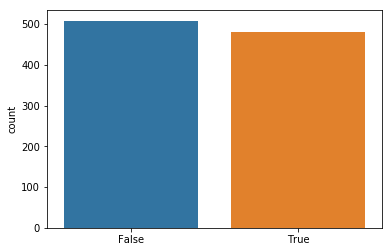

In [10]:
check = df_teams['toss_winner'] == df_teams['winner']
check.groupby(check).size()
sns.countplot(check)

#### Who is Successful?

In [11]:
df_teams['winner'].value_counts(sort=True)

Australia       172
India           157
Sri Lanka       130
South Africa    118
England         114
New Zealand      99
Pakistan         97
West Indies      60
Bangladesh       39
Afghanistan       3
Name: winner, dtype: int64

In [12]:
# Checking the nan values
df_teams.apply(lambda x: sum(x.isnull()),axis=0) 

team1            0
team2            0
date             0
venue            0
city           166
toss_winner      0
winner           0
dtype: int64

##### We will deal with handling the nan values in city quite differently later...! 
##### Let us first gather data from everywhere

###### Getting ICC rankings data 

In [13]:
results_final = pd.merge(df_teams,rankings,how='left',left_on='team1',right_on='Team')

del results_final['Team']

results_final.rename(columns={'Position':'Team1_Position',
                          'Points':'Team1_Points',
                          }, 
                 inplace=True)


results_final = pd.merge(results_final,rankings,how='left',left_on='team2',right_on='Team')

del results_final['Team']

results_final.rename(columns={'Position':'Team2_Position',
                          'Points':'Team2_Points',
                          }, 
                 inplace=True)


In [14]:
#Filling nan values with first word of venue

results_final.city = results_final.city.fillna(value=results_final.venue.str.split().str.get(0))

results_final.apply(lambda x: sum(x.isnull()),axis=0) 
del results_final['date']

#### This results_final dataset contains the information of matches held from 2006 with their ratings and points of each team respectively

### results_final datset will used as a training set post data cleaning

In [15]:
results_final

team1         team2  \
0     West Indies    Bangladesh   
1         England    Bangladesh   
2     West Indies         India   
3     West Indies    Bangladesh   
4       Sri Lanka     Australia   
5       Australia      Pakistan   
6      Bangladesh     Australia   
7     New Zealand     Sri Lanka   
8           India  South Africa   
9           India   New Zealand   
10       Pakistan     Sri Lanka   
11     Bangladesh         India   
12          India       England   
13      Australia     Sri Lanka   
14     Bangladesh   Afghanistan   
15     Bangladesh     Sri Lanka   
16      Australia      Pakistan   
17      Sri Lanka      Pakistan   
18      Australia      Pakistan   
19    West Indies       England   
20        England     Australia   
21        England      Pakistan   
22    New Zealand     Australia   
23     Bangladesh      Pakistan   
24          India       England   
25     Bangladesh   Afghanistan   
26          India       England   
27          India  South Africa   
28    Afghanistan    Bangladesh   
29      Australia      Pakistan   
..            ...           ...   
959       England     Sri Lanka   
960     Australia  South Africa   
961  South Africa     Sri Lanka   
962   New Zealand   West Indies   
963   New Zealand       England   
964     Australia       England   
965       England     Australia   
966     Sri Lanka   New Zealand   
967   West Indies  South Africa   
968     Sri Lanka       England   
969     Sri Lanka         India   
970       England         India   
971   West Indies      Pakistan   
972  South Africa      Pakistan   
973     Australia     Sri Lanka   
974     Sri Lanka      Pakistan   
975     Australia   New Zealand   
976     Australia     Sri Lanka   
977         India     Sri Lanka   
978   West Indies     Australia   
979  South Africa      Pakistan   
980   West Indies      Pakistan   
981  South Africa     Australia   
982     Sri Lanka         India   
983     Sri Lanka      Pakistan   
984     Australia     Sri Lanka   
985         India       England   
986     Sri Lanka         India   
987   West Indies    Bangladesh   
988       England   West Indies   

                                                 venue         city  \
0                          Kensington Oval, Bridgetown     Barbados   
1                                            Edgbaston   Birmingham   
2                                Sabina Park, Kingston      Jamaica   
3                                 Windsor Park, Roseau     Dominica   
4    Mahinda Rajapaksa International Cricket Stadiu...   Hambantota   
5                  Dubai International Cricket Stadium        Dubai   
6                        Shere Bangla National Stadium       Mirpur   
7                                       Sophia Gardens      Cardiff   
8                             Melbourne Cricket Ground    Melbourne   
9                                        Nehru Stadium     Guwahati   
10                 Dubai International Cricket Stadium        Dubai   
11              Rangiri Dambulla International Stadium      Rangiri   
12                               M Chinnaswamy Stadium    Bangalore   
13              Brisbane Cricket Ground, Woolloongabba     Brisbane   
14                       Shere Bangla National Stadium       Mirpur   
15                       Shere Bangla National Stadium       Mirpur   
16                                Sheikh Zayed Stadium    Abu Dhabi   
17                        Sinhalese Sports Club Ground      Colombo   
18                             Sharjah Cricket Stadium      Sharjah   
19            Sir Vivian Richards Stadium, North Sound      Antigua   
20                                        Old Trafford   Manchester   
21                                       The Rose Bowl  Southampton   
22                                         Seddon Park     Hamilton   
23              Rangiri Dambulla International Stadium      Rangiri   
24              Saurashtra Cricket Association Stadium       Rajko

In [16]:
results_final.isnull().sum()

team1             0
team2             0
venue             0
city              0
toss_winner       0
winner            0
Team1_Position    0
Team1_Points      0
Team2_Position    0
Team2_Points      0
dtype: int64

In [17]:
# Still gathering info from fixtures data as well

#### Here are we are tring to add the world cup fictures data into the form results_final format

In [18]:
fixtures.rename(columns={'Date':'date',
                          'Location':'venue',
                          'Team_1':'team1',
                          'Team_2':'team2',
                          'Result':'winner'
                          }, 
                 inplace=True)
fixtures_raw_data['city']=fixtures_raw_data.Data.str.split('-').str.get(1)

fixtures['city']=fixtures_raw_data['city']

pred_test = pd.merge(fixtures,rankings,how='left',left_on='team1',right_on='Team')

del pred_test['Team']

pred_test.rename(columns={'Position':'Team1_Position',
                          'Points':'Team1_Points',
                          }, 
                 inplace=True)


pred_test = pd.merge(pred_test,rankings,how='left',left_on='team2',right_on='Team')

del pred_test['Team']

pred_test.rename(columns={'Position':'Team2_Position',
                          'Points':'Team2_Points',
                          }, 
                 inplace=True)

del pred_test['Group ']


In [19]:
pred_test

Round Number        date                                         venue  \
0             1  30/05/2019                       Kennington Oval, London   
1             1  31/05/2019                      Trent Bridge, Nottingham   
2             1    1/6/2019                       Sophia Gardens, Cardiff   
3             1    1/6/2019                        County Ground, Bristol   
4             1    2/6/2019                       Kennington Oval, London   
5             1    3/6/2019                      Trent Bridge, Nottingham   
6             1    4/6/2019                       Sophia Gardens, Cardiff   
7             1    5/6/2019                    The Rose Bowl, Southampton   
8             1    5/6/2019                       Kennington Oval, London   
9             1    6/6/2019                      Trent Bridge, Nottingham   
10            1    7/6/2019                        County Ground, Bristol   
11            1    8/6/2019                       Sophia Gardens, Cardiff   
12            1    8/6/2019  The Cooper Associates County Ground, Taunton   
13            1    9/6/2019                       Kennington Oval, London   
14            1   10/6/2019                    The Rose Bowl, Southampton   
15            1   11/6/2019                        County Ground, Bristol   
16            1   12/6/2019  The Cooper Associates County Ground, Taunton   
17            1  13/06/2019                      Trent Bridge, Nottingham   
18            1  14/06/2019                    The Rose Bowl, Southampton   
19            1  15/06/2019                       Kennington Oval, London   
20            1  15/06/2019                       Sophia Gardens, Cardiff   
21            1  16/06/2019             Emirates Old Trafford, Manchester   
22            1  17/06/2019  The Cooper Associates County Ground, Taunton   
23            1  18/06/2019             Emirates Old Trafford, Manchester   
24            1  19/06/2019                         Edgbaston, Birmingham   
25            1  20/06/2019                      Trent Bridge, Nottingham   
26            1  21/06/2019                             Headingley, Leeds   
27            1  22/06/2019                    The Rose Bowl, Southampton   
28            1  22/06/2019             Emirates Old Trafford, Manchester   
29            1  23/06/2019                                Lord's, London   
30            1  24/06/2019                    The Rose Bowl, Southampton   
31            1  25/06/2019                                Lord's, London   
32            1  26/06/2019                         Edgbaston, Birmingham   
33            1  27/06/2019             Emirates Old Trafford, Manchester   
34            1  28/06/2019           Riverside Ground, Chester-le-Street   
35            1  29/06/2019                             Headingley, Leeds   
36            1  29/06/2019                                Lord's, London   
37            1  30/06/2019                         Edgbaston, Birmingham   
38            1    1/7/2019           Riverside Ground, Chester-le-Street   
39            1    2/7/2019                         Edgbaston, Birmingham   
40            1    3/7/2019           Riverside Ground, Chester-le-Street   
41            1    4/7/2019                             Headingley, Leeds   
42            1    5/7/2019                                Lord's, London   
43            1    6/7/2019                             Headingley, Leeds   
44            1    6/7/2019             Emirates Old Trafford, Manchester   
45  Semi Finals    9/7/2019             Emirates Old Trafford, Manchester   
46  Semi Finals   11/7/2019                         Edgbaston, Birmingham   
47       Finals  14/07/2019                                Lord's, London   

              team1            team2  winner                   city  \
0           England     South Africa     NaN               The Oval   
1       West Indies         Pakistan     NaN           Trent Bridge   
2       New Zeal

In [20]:
# let us assign value train for results_final to have filtering later
# let us assign value test for pred_test for filtering - used later

In [21]:
pred_test['type']='test'
results_final['type']='train'

In [22]:
# Assingn the target variable to y
y= results_final['winner']


In [23]:
# dropping target variable from results data and unrelavant data from pred test
results_final = results_final.drop(['winner'], axis=1)
del pred_test['date']
del pred_test['winner']
del pred_test['Round Number']


In [24]:
# Creating randamized function to decide the toss winner for our testing data
def randamize(teams):
    random.shuffle(teams)
    return teams[0]
pred_test['toss_winner']=randamize([pred_test['team1'],pred_test['team2']])
pred_test.head(5)

venue         team1         team2  \
0   Kennington Oval, London       England  South Africa   
1  Trent Bridge, Nottingham   West Indies      Pakistan   
2   Sophia Gardens, Cardiff   New Zealand     Sri Lanka   
3    County Ground, Bristol   Afghanistan     Australia   
4   Kennington Oval, London  South Africa    Bangladesh   

                    city  Team1_Position  Team1_Points  Team2_Position  \
0               The Oval             1.0         125.0             3.0   
1           Trent Bridge             8.0          77.0             6.0   
2  Cardiff Wales Stadium             4.0         113.0             9.0   
3                Bristol            10.0          63.0             5.0   
4               The Oval             3.0         115.0             7.0   

   Team2_Points  type   toss_winner  
0         115.0  test  South Africa  
1          94.0  test      Pakistan  
2          76.0  test     Sri Lanka  
3         109.0  test     Australia  
4          90.0  test    Bangladesh

### Feature Engineering

#### Creating a meta dataframe from results_final(train) and pred_test(test) 

In [25]:
# This is necessary because we have to do engineer our features for both train and test once
data_meta=results_final.append(pred_test,ignore_index=True)

/home/sanjayd/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [26]:
# Extract train data from meta data
# Let us consider the data till group stages 
all_df=data_meta.head(len(data_meta)-3)
train=all_df[all_df.type=='train']
del train['type']
#all_df contains test and train data leaving out semi finals and finals fixtures

In [27]:
train

Team1_Points  Team1_Position  Team2_Points  Team2_Position         city  \
0            77.0             8.0          90.0             7.0     Barbados   
1           125.0             1.0          90.0             7.0   Birmingham   
2            77.0             8.0         121.0             2.0      Jamaica   
3            77.0             8.0          90.0             7.0     Dominica   
4            76.0             9.0         109.0             5.0   Hambantota   
5           109.0             5.0          94.0             6.0        Dubai   
6            90.0             7.0         109.0             5.0       Mirpur   
7           113.0             4.0          76.0             9.0      Cardiff   
8           121.0             2.0         115.0             3.0    Melbourne   
9           121.0             2.0         113.0             4.0     Guwahati   
10           94.0             6.0          76.0             9.0        Dubai   
11           90.0             7.0         121.0             2.0      Rangiri   
12          121.0             2.0         125.0             1.0    Bangalore   
13          109.0             5.0          76.0             9.0     Brisbane   
14           90.0             7.0          63.0            10.0       Mirpur   
15           90.0             7.0          76.0             9.0       Mirpur   
16          109.0             5.0          94.0             6.0    Abu Dhabi   
17           76.0             9.0          94.0             6.0      Colombo   
18          109.0             5.0          94.0             6.0      Sharjah   
19           77.0             8.0         125.0             1.0      Antigua   
20          125.0             1.0         109.0             5.0   Manchester   
21          125.0             1.0          94.0             6.0  Southampton   
22          113.0             4.0         109.0             5.0     Hamilton   
23           90.0             7.0          94.0             6.0      Rangiri   
24          121.0             2.0         125.0             1.0       Rajkot   
25           90.0             7.0          63.0            10.0       Mirpur   
26          121.0             2.0         125.0             1.0   Jamshedpur   
27          121.0             2.0         115.0             3.0  Southampton   
28           63.0            10.0          90.0             7.0     Canberra   
29          109.0             5.0          94.0             6.0     Adelaide   
..            ...             ...           ...             ...          ...   
959         125.0             1.0          76.0             9.0   Birmingham   
960         109.0             5.0         115.0             3.0       Hobart   
961         115.0             3.0          76.0             9.0       Sydney   
962         113.0             4.0          77.0             8.0     Auckland   
963         113.0             4.0         125.0             1.0       Napier   
964         109.0             5.0         125.0             1.0       Sydney   
965         125.0             1.0         109.0             5.0       London   
966          76.0             9.0         113.0             4.0   Hambantota   
967          77.0             8.0         115.0             3.0     Dominica   
968          76.0             9.0         125.0             1.0      Colombo   
969          76.0             9.0         121.0             2.0      Rangiri   
970         125.0             1.0         121.0             2.0       London   
971          77.0             8.0          94.0             6.0       Guyana   
972         115.0             3.0          94.0             6.0    Cape Town   
973         109.0             5.0          76.0             9.0     Brisbane   
974          76.0             9.0          94.0             6.0    Pallekele   
975         109.0             5.0         113.0             4.0     Adelaide   
976         109.0             5.0          76.0             9.0        Perth   
977  

##### Encoding

##### We need to encode the team from train data, city and venue from data_meta
###### This is because the team has definte data points in train and test whereas city and venue might not be definite in test & test and cannot be encoded if it is not present in testing data ( so should take the transformed values from metadata i.e data_meta)

In [28]:
team_encoding = LabelEncoder()
team_encoding.fit(train['team1'])
city_encoding=LabelEncoder()
city_encoding.fit(data_meta['city'])
venue_encoding=LabelEncoder()
venue_encoding.fit(data_meta['venue'])


LabelEncoder()

In [29]:
# Defining encoding class
def encode(df1):
    
    df1['team1']=team_encoding.transform(df1['team1'])
    df1['team2']=team_encoding.transform(df1['team2'])
    df1['toss_winner']=team_encoding.transform(df1['toss_winner'])
    df1['city']=city_encoding.transform(df1['city'])
    df1['venue']=venue_encoding.transform(df1['venue'])
    
    return df1

In [30]:
all_df=encode(all_df)
train=encode(train)
train

/home/sanjayd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/sanjayd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/sanjayd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Team1_Points  Team1_Position  Team2_Points  Team2_Position  city  team1  \
0            77.0             8.0          90.0             7.0     6      9   
1           125.0             1.0          90.0             7.0     9      3   
2            77.0             8.0         121.0             2.0    53      9   
3            77.0             8.0          90.0             7.0    31      9   
4            76.0             9.0         109.0             5.0    45      8   
5           109.0             5.0          94.0             6.0    32      1   
6            90.0             7.0         109.0             5.0    70      2   
7           113.0             4.0          76.0             9.0    17      5   
8           121.0             2.0         115.0             3.0    69      4   
9           121.0             2.0         113.0             4.0    42      4   
10           94.0             6.0          76.0             9.0    32      6   
11           90.0             7.0         121.0             2.0    88      2   
12          121.0             2.0         125.0             1.0     5      4   
13          109.0             5.0          76.0             9.0    12      1   
14           90.0             7.0          63.0            10.0    70      2   
15           90.0             7.0          76.0             9.0    70      2   
16          109.0             5.0          94.0             6.0     0      1   
17           76.0             9.0          94.0             6.0    25      8   
18          109.0             5.0          94.0             6.0    90      1   
19           77.0             8.0         125.0             1.0     3      9   
20          125.0             1.0         109.0             5.0    67      3   
21          125.0             1.0          94.0             6.0    91      3   
22          113.0             4.0         109.0             5.0    46      5   
23           90.0             7.0          94.0             6.0    88      2   
24          121.0             2.0         125.0             1.0    86      4   
25           90.0             7.0          63.0            10.0    70      2   
26          121.0             2.0         125.0             1.0    54      4   
27          121.0             2.0         115.0             3.0    91      4   
28           63.0            10.0          90.0             7.0    15      0   
29          109.0             5.0          94.0             6.0     1      1   
..            ...             ...           ...             ...   ...    ...   
959         125.0             1.0          76.0             9.0     9      3   
960         109.0             5.0         115.0             3.0    49      1   
961         115.0             3.0          76.0             9.0    95      7   
962         113.0             4.0          77.0             8.0     4      5   
963         113.0             4.0         125.0             1.0    75      5   
964         109.0             5.0         125.0             1.0    95      1   
965         125.0             1.0         109.0             5.0    65      3   
966          76.0             9.0         113.0             4.0    45      8   
967          77.0             8.0         115.0             3.0    31      9   
968          76.0             9.0         125.0             1.0    25      8   
969          76.0             9.0         121.0             2.0    88      8   
970         125.0             1.0         121.0             2.0    65      3   
971          77.0             8.0          94.0             6.0    43      9   
972         115.0             3.0          94.0             6.0    16      7   
973         109.0             5.0          76.0             9.0    12      1   
974          76.0             9.0          94.0             6.0    79      8   
975         109.0             5.0         113.0             4.0     1      1   
976         109.0             5.0          76.0             9.0    80      1   
977  

In [31]:
# Filtering the data into group stages, semi final and finals
group_stages=all_df[all_df.type=='test']
del group_stages['type']
semi_final=group_stages.tail(3).head(2)
finals=group_stages.tail(1)

In [32]:
# Transforming the target variable y to y1

In [33]:
y1=team_encoding.transform(y)

### Predicting the model

##### I have chosen randomforest after running many classifiers besides in my local system and has proven good. SO going after this

In [34]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=0)

In [35]:
#Fit the model
rf.fit(train, y1) 
score = rf.score(train, y1)
score

0.890798786653185

In [36]:
#Accuracy is 89%

In [37]:
# Getting the mapping of team with its labels from label encoder

In [38]:
team_mapping = {k: v for k, v in zip(list(team_encoding.classes_), list(team_encoding.transform(team_encoding.classes_)))}
team_mapping

{'Afghanistan': 0,
 'Australia': 1,
 'Bangladesh': 2,
 'England': 3,
 'India': 4,
 'New Zealand': 5,
 'Pakistan': 6,
 'South Africa': 7,
 'Sri Lanka': 8,
 'West Indies': 9}

### Creating the predictions for the group stage matches

In [39]:
dict_predictions={}
predictions_df=pd.DataFrame()
for i in range(len(group_stages)):
    dict_predictions['team1']=list(team_mapping.keys())[list(team_mapping.values()).index(group_stages.team1.iloc[i])]
    dict_predictions['team2']=list(team_mapping.keys())[list(team_mapping.values()).index(group_stages.team2.iloc[i])]
    dict_predictions['model_winner']=list(team_encoding.inverse_transform(rf.predict(group_stages.iloc[i].values.reshape(1,-1))))[0]
    dict_predictions['team 1 win %']=rf.predict_proba(group_stages.iloc[i].values.reshape(1,-1))[0][group_stages.team1.iloc[i]]
    dict_predictions['team 2 win %']=rf.predict_proba(group_stages.iloc[i].values.reshape(1,-1))[0][group_stages.team2.iloc[i]]


    predictions_df=predictions_df.append(dict_predictions,ignore_index=True)
predictions_df['winner']=''

for i in range(len(predictions_df))    :
    if predictions_df['team 1 win %'][i] >predictions_df['team 2 win %'][i]:
        predictions_df['winner'][i]=predictions_df.team1[i]
    else:
        predictions_df['winner'][i]=predictions_df.team2[i]

/home/sanjayd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/sanjayd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### The model_winner column is the output from randomforest algorithm 

#### The winner column is derived and computed on basis of win probability of teams in each group stage
#### if team 1 win %	 > team 2 win %	, then winner is team1 else winner is team2

In [40]:
predictions_df

model_winner  team 1 win %  team 2 win %         team1         team2  \
0        England      0.681000      0.219000       England  South Africa   
1    West Indies      0.429762      0.382738   West Indies      Pakistan   
2    New Zealand      0.960000      0.040000   New Zealand     Sri Lanka   
3      Australia      0.000000      0.730000   Afghanistan     Australia   
4   South Africa      0.581667      0.000000  South Africa    Bangladesh   
5        England      0.631500      0.288500       England      Pakistan   
6      Sri Lanka      0.000000      0.870000   Afghanistan     Sri Lanka   
7   South Africa      0.716500      0.140167  South Africa         India   
8     Bangladesh      0.550000      0.410000    Bangladesh   New Zealand   
9      Australia      0.980000      0.000000     Australia   West Indies   
10     Sri Lanka      0.383476      0.586524      Pakistan     Sri Lanka   
11       England      0.705278      0.130000       England    Bangladesh   
12     Australia      0.000000      0.000000   Afghanistan   New Zealand   
13     Australia      0.340000      0.620000         India     Australia   
14  South Africa      0.714833      0.265167  South Africa   West Indies   
15     Sri Lanka      0.068333      0.879333    Bangladesh     Sri Lanka   
16     Australia      1.000000      0.000000     Australia      Pakistan   
17   New Zealand      0.343333      0.410000         India   New Zealand   
18       England      0.798333      0.170000       England   West Indies   
19     Australia      0.405833      0.443333     Sri Lanka     Australia   
20  South Africa      0.675000      0.065000  South Africa   Afghanistan   
21         India      0.659000      0.301000         India      Pakistan   
22   West Indies      0.551000      0.264333   West Indies    Bangladesh   
23       England      0.556667      0.068333       England   Afghanistan   
24  South Africa      0.308071      0.671929   New Zealand  South Africa   
25     Australia      0.980000      0.000000     Australia    Bangladesh   
26     Sri Lanka      0.440214      0.559786       England     Sri Lanka   
27     Australia      0.238667      0.050000         India   Afghanistan   
28   West Indies      0.668333      0.181667   West Indies   New Zealand   
29  South Africa      0.315000      0.645000      Pakistan  South Africa   
30   Afghanistan      0.200000      0.608000    Bangladesh   Afghanistan   
31     Australia      0.458214      0.541786       England     Australia   
32   New Zealand      0.930000      0.070000   New Zealand      Pakistan   
33         India      0.312286      0.637714   West Indies         India   
34  South Africa      0.448262      0.511738     Sri Lanka  South Africa   
35   Afghanistan      0.250000      0.291333      Pakistan   Afghanistan   
36   New Zealand      0.808333      0.191667   New Zealand     Australia   
37         India      0.424524      0.555476       England         India   
38     Sri Lanka      0.906667      0.030000     Sri Lanka   West Indies   
39         India      0.010000      0.930000    Bangladesh         India   
40       England      0.940000      0.060000       England   New Zealand   
41     Sri Lanka      0.000000      0.097500   Afghanistan   West Indies   
42      Pakistan      0.920000      0.000000      Pakistan    Bangladesh   
43         India      0.314762      0.667238     Sri Lanka         India   
44     Australia      0.795190      0.204810     Australia  South Africa   

          winner  
0        England  
1    West Indies  
2    New Zealand  
3      Australia  
4   South Africa  
5        England  
6      Sri Lanka  
7   South Africa  
8     Bangladesh  
9      Australia  
10     Sri Lanka  
11       England  
12   New Zealand  
13     Australia  
14  South Africa  
15     Sri Lanka  
16     Australia  
17   New Zealand  
18       England  
19     Australia  
20  South Africa  
21         India  
22   West Indies  
23       England  
24  South Africa  
25     Austra

### Deriving results from group stages and selecting top 4 teams for playoffs

In [41]:
top4=list(predictions_df['winner'].value_counts().head(4).index )
top4

['Australia', 'South Africa', 'India', 'England']

###### top1 vs top4 and top2 vs top3

In [42]:
#top 1 and top4 will face off in the first semi final
#top 2 and top3 will face off in the second semi final

In [43]:
semifinal1_team1=top4[0]
semifinal1_team2=top4[3]

semifinal2_team1=top4[1]
semifinal2_team2=top4[2]

print(semifinal1_team1)
print(semifinal1_team2)

print(semifinal2_team1)
print(semifinal2_team2)



Australia
England
South Africa
India


In [44]:
# Creating the input parameters from semifinalists to predict from rf model
def create_input(team1,team2,match):
    team_1=list(team_encoding.transform([team1]))[0]
    team_2=list(team_encoding.transform([team2]))[0]

    t1points=rankings.Points[rankings.Team==team1].iloc[0]
    t1position=rankings.Position[rankings.Team==team1].iloc[0]
    t2points=rankings.Points[rankings.Team==team2].iloc[0]
    t2position=rankings.Position[rankings.Team==team2].iloc[0]
    if(match=='semifinal1'):
        city=semi_final.city.iloc[0]
        venue=semi_final.venue.iloc[0]
    else:
        city=semi_final.city.iloc[1]
        venue=semi_final.venue.iloc[1]
    if(match=='final'):
        city=finals.city.iloc[0]
        venue=finals.venue.iloc[0]
        
    toss_winner=list(team_encoding.transform([randamize([team1,team2])]))[0]
    return [t1points,t1position,t2points,t2position,city,team_1, team_2,toss_winner, venue]
    

In [45]:
#creating input params for first semifinal
semi_finals1=create_input(semifinal1_team1,semifinal1_team2,'semifinal1')        
semi_finals1

[109, 5, 125, 1, 66, 1, 3, 3, 53]

In [46]:
# Defining a function to predict the winner
def predict_winner(team_data):    
    playoff_winner= list(team_encoding.inverse_transform(rf.predict(np.array(team_data).reshape(1,-1))))[0]
#    team1_per=rf.predict_proba(np.array(team_data).reshape(1,-1))[0][team_data[5]]
#    team2_per=rf.predict_proba(np.array(team_data).reshape(1,-1))[0][team_data[6]]
    return playoff_winner

In [47]:
semifinals1_winner=predict_winner(semi_finals1)
semifinals1_winner

'Australia'

In [48]:
semi_finals2=create_input(semifinal2_team1,semifinal2_team2,'semifinal2')        

semifinals2_winner=predict_winner(semi_finals2)
semifinals2_winner

'South Africa'

### semifinals1_winner and semifinals2_winner will face off for a final battle to get the wordlcup home

#### Let us see who won...!?

In [49]:
final_teams=create_input(semifinals1_winner,semifinals2_winner,'final')        

final_winner=predict_winner(final_teams)


In [50]:
final_winner

'Australia'

# This concludes my prediction on ICC Worldcup 2019. See you in 2023 :D